In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as sparse
import gc
import os
import matplotlib.pyplot as plt

In [2]:
#product = pd.read_csv('E:/train- Capillary 4/product_attributes.csv')
img_name=os.listdir('E:/train- Capillary 4/images')
#train_df=pd.read_csv('E:/train- Capillary 4/train.csv')
#products=list(product['productid'].unique())

In [3]:
from keras.models import Model
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.metrics.pairwise import pairwise_distances,cosine_distances

Using TensorFlow backend.


In [5]:
# reading all images
images = []
def preprocess_input(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x

for i in img_name:
    image = load_img('E:/train- Capillary 4/images/{}'.format(i), target_size=(100, 100))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = np.expand_dims(image, axis=0)
    # prepare the image for the  model
    image = preprocess_input(image)
    
    
    images.append(image)

In [6]:
images[0].shape

(1, 100, 100, 3)

In [7]:
images1 = np.array(images).reshape(3026,100, 100,3)

W0921 15:42:19.696936  6664 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


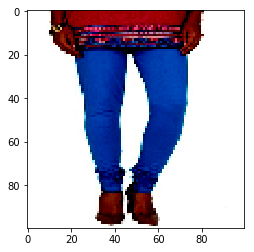

In [20]:
plt.imshow(images1[8])

In [9]:
images1[0].shape

(100, 100, 3)

In [10]:
#Convolution Layer
input_img = Input(shape=(100,100,3))
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='relu', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

W0921 15:20:51.994153  6664 deprecation_wrapper.py:119] From C:\Users\Sandra\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [11]:
#Extractig the feature layer from images
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)

In [12]:
#fitting the model for the images
autoencoder.fit(images1,images1,epochs=30,batch_size=64)

W0921 15:20:55.333732  6664 deprecation_wrapper.py:119] From C:\Users\Sandra\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/30
3026/3026 [==============================] - 41s 14ms/step - loss: 0.3130
Epoch 2/30
3026/3026 [==============================] - 40s 13ms/step - loss: 0.1418
Epoch 3/30
3026/3026 [==============================] - 40s 13ms/step - loss: 0.1162
Epoch 4/30
3026/3026 [==============================] - 40s 13ms/step - loss: 0.1042
Epoch 5/30
3026/3026 [==============================] - 40s 13ms/step - loss: 0.0997
Epoch 6/30
3026/3026 [==============================] - 41s 13ms/step - loss: 0.0972
Epoch 7/30
3026/3026 [==============================] - 40s 13ms/step - loss: 0.0954
Epoch 8/30
3026/3026 [==============================] - 41s 13ms/step - loss: 0.0942
Epoch 9/30
3026/3026 [==============================] - 42s 14ms/step - loss: 0.0932
Epoch 10/30
3026/3026 [==============================] - 41s 14ms/step - loss: 0.0923
Epoch 11/30
3026/3026 [==============================] - 40s 13ms/step - loss: 0.0916
Epoch 12/30
3026/3026 [==============================] - 41s 14

In [22]:
#predictig the images after convolution
encode_images= encoder.predict(images1).reshape(3026,1352)


In [23]:
img_name=list(img_name)  
imgs_name_productid = []
for i in img_name:
  imgs_name_productid.append(int(i.split('.')[0]))

In [24]:
imgs_name_productid

[11139192,
 11139194,
 11139524,
 11139560,
 11139588,
 11139650,
 11141306,
 11141308,
 11141318,
 11141320,
 11141324,
 11141326,
 11141328,
 11141330,
 11141338,
 11141340,
 11141342,
 11141346,
 11141354,
 11141530,
 11141538,
 11141644,
 11144136,
 11144260,
 11145600,
 11145602,
 11145612,
 11145614,
 11145620,
 11145624,
 11145626,
 11145634,
 11145640,
 11145642,
 11145654,
 11145664,
 11145666,
 11145684,
 11145702,
 11145726,
 11145728,
 11145740,
 11145744,
 11145748,
 11145762,
 11146082,
 11146084,
 11146384,
 11146754,
 11147250,
 11147252,
 11147258,
 11147268,
 11147280,
 11147282,
 11147290,
 11147292,
 11147300,
 11147312,
 11147324,
 11147512,
 11147534,
 11147546,
 11147548,
 11147600,
 11147622,
 11148212,
 11148440,
 11148482,
 11148514,
 11148516,
 11148792,
 11148854,
 11148860,
 11148888,
 11148902,
 11148920,
 11148922,
 11148954,
 11148964,
 11148966,
 11148980,
 11148982,
 11148984,
 11149026,
 11149036,
 11149062,
 11149198,
 11149838,
 11149842,
 11149866,

In [25]:
#Making those features in the datafrane
image_features_encoded = pd.DataFrame(encode_images,index=imgs_name_productid)
image_features_encoded.index.name='productid'
image_features_encoded

,0,1,2,3,4,5,6,7,8,9,...,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351
productid,,,,,,,,,,,,,,,,,,,,,
11139192,0.563746,0.717468,0.463570,0.181280,0.282023,0.170096,0.131614,0.480494,0.648144,0.706897,...,0.000000,0.598665,0.382255,0.589786,0.255087,0.176760,0.0,0.000000,0.000000,0.376585
11139194,0.563746,0.717468,0.463570,0.181280,0.282023,0.170096,0.131614,0.480494,0.679699,0.719060,...,0.000000,0.598665,0.382255,0.589786,0.255087,0.176760,0.0,0.000000,0.000000,0.376585
11139524,0.563746,0.717468,0.463570,0.181280,0.282023,0.170096,0.131614,0.480494,0.646703,0.704350,...,0.000000,0.598665,0.382255,0.589786,0.255087,0.176760,0.0,0.000000,0.000000,0.376585
11139560,0.563746,0.717468,0.463570,0.181280,0.282023,0.170096,0.131614,0.480494,0.646703,0.704350,...,0.000000,0.598665,0.382255,0.589786,0.255087,0.176760,0.0,0.000000,0.000000,0.376585
11139588,0.573195,0.728850,0.474104,0.174559,0.282023,0.170096,0.129244,0.485201,0.818376,0.808042,...,0.000000,0.598665,0.382255,0.589786,0.255087,0.176760,0.0,0.000000,0.000000,0.376585
11139650,0.563746,0.717468,0.463570,0.181280,0.282023,0.170096,0.131614,0.480494,0.646703,0.704350,...,0.000000,0.598665,0.382255,0.589786,0.255087,0.176760,0.0,0.000000,0.000000,0.376585
11141306,0.563746,0.717468,0.463570,0.181280,0.282023,0.170096,0.131614,0.480494,0.672961,0.708972,...,0.000000,0.598665,0.382255,0.589786,0.255087,0.176760,0.0,0.000000,0.000000,0.376585
11141308,0.563746,0.717468,0.463570,0.181280,0.282023,0.170096,0.131614,0.480494,0.695561,0.730703,...,0.000000,0.598665,0.382255,0.589786,0.255087,0.176760,0.0,0.000000,0.000000,0.376585
11141318,0.682168,0.821977,0.699858,0.154735,0.290530,0.169645,0.118593,0.471150,0.778764,0.690857,...,0.000000,0.598750,0.382431,0.590012,0.255624,0.176909,0.0,0.000000,0.000000,0.376585


In [26]:
im=images[0]
im.shape


(1, 100, 100, 3)

In [29]:
encode_sing_images= encoder.predict(im).reshape(1,1352)
encode_sing_images.shape

(1, 1352)

In [30]:
sing_whole_similarity = pairwise_distances(encode_sing_images,image_features_encoded, metric='cosine')
sing_whole_similarity[0]

array([5.9604645e-08, 8.7975740e-02, 9.3546391e-02, ..., 9.5463336e-02,
       3.3163393e-01, 5.6553900e-02], dtype=float32)

In [31]:
np.max(sing_whole_similarity[0])

0.5713285

In [32]:
sing_whole_similarity_df = pd.DataFrame(sing_whole_similarity[0]) 
sing_whole_similarity_df

,0
0,5.960464e-08
1,8.797574e-02
2,9.354639e-02
3,6.702530e-02
4,8.993876e-02
5,9.048772e-02
6,9.898520e-02
7,9.065187e-02
8,7.809055e-02
9,5.414683e-02


In [33]:
sing_whole_similarity_df.nlargest(10, 0, keep='first')

,0
2354,0.571329
2321,0.569679
2840,0.544894
2320,0.513458
2299,0.503137
2831,0.501437
2835,0.493241
2897,0.492222
2294,0.479579
2904,0.477192


In [34]:
sing_whole_similarity_df.nsmallest(10, 0, keep='first')

,0
0,5.960464e-08
621,3.114533e-02
2495,3.378516e-02
2217,3.396451e-02
1870,3.424901e-02
951,3.715056e-02
1286,3.774595e-02
241,3.869331e-02
1869,4.052269e-02
1828,4.054314e-02


In [36]:
i=[]
for im in images:
    encode_sing_images= encoder.predict(im).reshape(1,1352)
    sing_whole_similarity = pairwise_distances(encode_sing_images,image_features_encoded, metric='cosine')
    sing_whole_similarity_df = pd.DataFrame(sing_whole_similarity[0]) 
    i.append(sing_whole_similarity_df.nsmallest(15, 0, keep='first').index.values)

In [41]:
i

[array([   0,  621, 2495, 2217, 1870,  951, 1286,  241, 1869, 1828, 2830,
        2492, 2825, 1855, 1859], dtype=int64),
 array([   1, 1865, 1868, 1867, 3013, 2798, 2448, 2446, 1372,  458, 2593,
         589, 2429, 1853, 1864], dtype=int64),
 array([   2,    5, 2980, 1627, 2971, 2076, 1634, 2554, 2547, 1704,   27,
        2115, 1687,   49, 2127], dtype=int64),
 array([   3, 2145,  963, 1012,  488, 2209, 2656,  636,  694, 1889,  682,
        1782,  801, 2263,  714], dtype=int64),
 array([   4, 1853,   67, 2401,  619,  852, 2404,    9,  590,  275,  559,
        1277, 1374, 2593,  467], dtype=int64),
 array([   5,    2,   27, 1704,  824, 1634, 1687, 1627, 2115, 2554, 2079,
        2246,   63, 2036, 1778], dtype=int64),
 array([   6,    7,  457, 2404, 2429, 1364, 1853,  458, 2403, 2428, 2278,
        1865, 2395, 2402, 2805], dtype=int64),
 array([   7,    6,  457,   18, 2278,  119, 2430, 2805,  313,  619,  458,
        2404,  314, 2402, 2505], dtype=int64),
 array([   8,   15,    9, 1192, 

In [45]:
len(i)

3026

In [46]:
my_df = pd.DataFrame(i )
my_df.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [47]:
my_df.to_csv('my_csv.csv', index=False)